# Assignment 1b
## Task 1
### Process of code writing

In [66]:
#import library
import xarray as xr
import numpy as np
import os
import salem 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs 

In [67]:
#In this code, we import the os module and use the os.path.getsize() 
#to observe the size for each file
V_file_size = os.path.getsize("/mnt/data/MetService_WRF/V_20200101000000.nc")
print(f"Size of ds_V dataset: {V_file_size / (1024 * 1024):.2f} MB")

U_file_size = os.path.getsize("/mnt/data/MetService_WRF/U_20200101000000.nc")
print(f"Size of ds_U dataset: {U_file_size / (1024 * 1024):.2f} MB")

Size of ds_V dataset: 3402.60 MB
Size of ds_U dataset: 3402.60 MB


In [68]:
#load data file of U_20200101000000.nc, and filter out height = 10
ds_U = xr.open_dataset("/mnt/data/MetService_WRF/U_20200101000000.nc")
ds_U_sel_height = ds_U.sel(height = 10)
ds_U_sel_height

<xarray.Dataset>
Dimensions:  (time: 744, lat: 508, lon: 472)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 10.0
Data variables:
    U        (time, lat, lon) float32 ...

In [69]:
#read data file of V_20200101000000.nc, and filter out height = 10
ds_V = xr.open_dataset("/mnt/data/MetService_WRF/V_20200101000000.nc")
ds_V_sel_height = ds_V.sel(height = 10)
ds_V_sel_height

<xarray.Dataset>
Dimensions:  (time: 744, lat: 508, lon: 472)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 10.0
Data variables:
    V        (time, lat, lon) float32 ...

In [70]:
#merge ds_U and ds_V by calling merge() function. 

ds_UV_sel_height = xr.merge([ds_U_sel_height, ds_V_sel_height], join="inner", compat="equals")
ds_UV_sel_height

<xarray.Dataset>
Dimensions:  (time: 744, lat: 508, lon: 472)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 10.0
Data variables:
    U        (time, lat, lon) float32 ...
    V        (time, lat, lon) float32 ...

In [71]:
ds_UV_sel_height['WS'] = np.sqrt(ds_UV_sel_height.V**2 + ds_UV_sel_height.U**2)
ds_UV_sel_height

<xarray.Dataset>
Dimensions:  (time: 744, lat: 508, lon: 472)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 10.0
Data variables:
    U        (time, lat, lon) float32 6.83 6.83 6.8 6.75 ... 5.12 5.11 5.11 5.09
    V        (time, lat, lon) float32 2.32 2.36 2.39 2.41 ... 3.59 3.6 3.61 3.62
    WS       (time, lat, lon) float32 7.214 7.226 7.208 ... 6.25 6.256 6.247

In [72]:
mean_WS = ds_UV_sel_height['WS'].mean(dim = "time")

In [73]:
mean_WS

<xarray.DataArray 'WS' (lat: 508, lon: 472)>
array([[9.945411 , 9.949885 , 9.950336 , ..., 7.169188 , 7.16389  ,
        7.161511 ],
       [9.9257145, 9.930447 , 9.93355  , ..., 7.1586165, 7.150105 ,
        7.1454053],
       [9.906356 , 9.912076 , 9.91636  , ..., 7.149594 , 7.144263 ,
        7.142824 ],
       ...,
       [4.770513 , 4.7658863, 4.766819 , ..., 5.894616 , 5.890496 ,
        5.881771 ],
       [4.7690816, 4.765195 , 4.760821 , ..., 5.883497 , 5.8813024,
        5.8727436],
       [4.755022 , 4.752947 , 4.750719 , ..., 5.869205 , 5.865661 ,
        5.8580585]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 10.0

### Answer

In [74]:
def ws_monthavg_10m(year = 2020, month = 1, sel_height = 10):
    """This function takes one year, one month and one selected height as inputs and returns a greeting string."""
    #create ulrs for U file and V file
    month = "{:02d}".format(month)
    U_file_url = "/mnt/data/MetService_WRF/V_" + str(year) + str(month)+ "01000000.nc"
    V_file_url = "/mnt/data/MetService_WRF/U_" + str(year) + str(month) + "01000000.nc"
    
    #read data from U file and V file
    ds_U = xr.open_dataset(U_file_url)
    ds_V = xr.open_dataset(V_file_url)
    
    #filter out height = 10 for each file of U and V
    ds_U_sel_height = ds_U.sel(height = sel_height)
    ds_V_sel_height = ds_V.sel(height = sel_height)
    
    #merge ds_U_sel_height and ds_V_sel_height to ds_UV_sel_height by calling merge() function. 
    ds_UV_sel_height = xr.merge([ds_U_sel_height, ds_V_sel_height], join="inner", compat="equals")
    
    #calculate Windspeed basesd on the equation, can create a new variable called WS
    ds_UV_sel_height['WS'] = np.sqrt(ds_UV_sel_height.V**2 + ds_UV_sel_height.U**2)
    
    #Average across time for the entire month 
    mean_WS = ds_UV_sel_height['WS'].mean(dim = "time")
    
    #add attibutes for this data
    mean_WS.attrs["year"] = year
    mean_WS.attrs["month"] = month
    mean_WS.attrs["height"] = sel_height
    
    return mean_WS

In [75]:
#call function by input year, month and height
mean_WS_2020_01_10 = ws_monthavg_10m(year = 2020, month = 1, sel_height = 10)
mean_WS_2020_01_10

<xarray.DataArray 'WS' (lat: 508, lon: 472)>
array([[9.945411 , 9.949885 , 9.950336 , ..., 7.169188 , 7.16389  ,
        7.161511 ],
       [9.9257145, 9.930447 , 9.93355  , ..., 7.1586165, 7.150105 ,
        7.1454053],
       [9.906356 , 9.912076 , 9.91636  , ..., 7.149594 , 7.144263 ,
        7.142824 ],
       ...,
       [4.770513 , 4.7658863, 4.766819 , ..., 5.894616 , 5.890496 ,
        5.881771 ],
       [4.7690816, 4.765195 , 4.760821 , ..., 5.883497 , 5.8813024,
        5.8727436],
       [4.755022 , 4.752947 , 4.750719 , ..., 5.869205 , 5.865661 ,
        5.8580585]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 10.0
Attributes:
    year:     2020
    month:    01
    height:   10

## Task 2
### Process of code writing

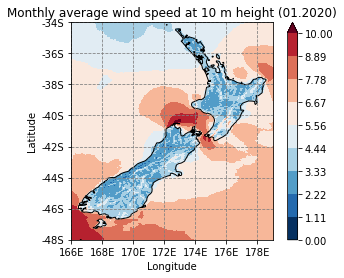

In [77]:
fig, ax = plt.subplots()
levels = np.linspace(0, 10, 10) # define the levels to plot
fig = mean_WS_2020_01_10.salem.quick_map(cmap="RdBu_r",vmin=0,vmax=10, levels=levels)
title = f"Monthly average wind speed at {mean_WS_2020_01_10.attrs['height']} m height ({mean_WS_2020_01_10.attrs['month']}.{mean_WS_2020_01_10.attrs['year']})"
ax.set_title(title)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

### Answer

In [86]:
def ws_monthavg10m_map(df = mean_WS_2020_01_10, cmap = "RdBu_r", vmin = 0, vmax = 10):
    """to plot a contour map of the wind speed, the parameters are dataArray from function ws_monthavg_10m(), cmap, vmin and vmax. """
    fig, ax = plt.subplots()
    levels = np.linspace(vmin, vmax, 10) # define the levels to plot
    fig = df.salem.quick_map(cmap=cmap,vmin=vmin,vmax=vmax, levels=levels)

    #add title and xlabel and ylabel
    title = f"Monthly average wind speed at {df.attrs['height']} m height ({df.attrs['month']}.{df.attrs['year']})"
    ax.set_title(title)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    
    fig= plt.gcf()
    fig.set_dpi(120)
    
    plt.show()

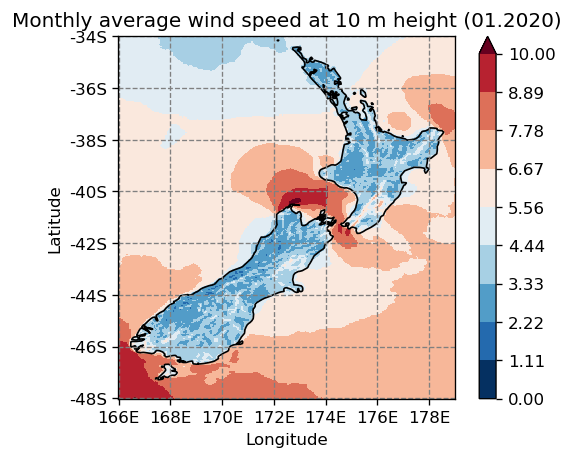

In [87]:
ws_monthavg10m_map(df = mean_WS_2020_01_10, cmap = "RdBu_r", vmin = 0, vmax = 10)